<a href="https://colab.research.google.com/github/rajkumarin/Deep_Learning_on_Images/blob/main/ANLY_535_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP1. Introduction to GPU**

In [1]:
from tensorflow.python.client import device_lib
print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13305368 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4412002064529847891
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14509932544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2709099007152393272
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [2]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import time
start = time.time()
!python3 "/content/gdrive/MyDrive/Colab Notebooks/mnist_cnn.py"
end = time.time()
print(end - start)

2021-07-01 15:43:55.631329: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
2021-07-01 15:43:57.748668: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-01 15:43:57.753756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-01 15:43:57.754317: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-01 15:43:57.754359: I tensorflow/stream_executor/platform/default/dso_loa

**Q1- A Keras code is provided for running hand written recognition on both GPU and CPU. Run the code on colab and your own machine and compare the results.**

 - It took 89 seconds using a GPU while a CPU takes xxxxxx seconds

# **STEP2. Implement handwritten recognition in Tensorflow using CNN**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
if K.image_data_format() == 'channels_first':
 x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
 x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
 input_shape = (1, img_rows, img_cols)
else:
 x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
 x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
 input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

**Q2- Explain the way that this model is designed. Talk about all the layers and their functionality.**

- The model is a CNN
- It has 2 convolutional layers
- A pooling layer with 25% dropout
- A flat NN with one hidden layer with 50% dropout and a output layer

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
final_model = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_split=0.2)
 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/12
375/375 [==============================] - 35s 9ms/step - loss: 1.2379 - accuracy: 0.5840 - val_loss: 0.3597 - val_accuracy: 0.8989
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.4872 - accuracy: 0.8486 - val_loss: 0.2728 - val_accuracy: 0.9175
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.4177 - accuracy: 0.8706 - val_loss: 0.2248 - val_accuracy: 0.9335
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3856 - accuracy: 0.8807 - val_loss: 0.2104 - val_accuracy: 0.9396
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3626 - accuracy: 0.8882 - val_loss: 0.1931 - val_accuracy: 0.9427
Epoch 6/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3505 - accuracy: 0.8921 - val_loss: 0.1883 - val_accuracy: 0.9431
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3371 - accuracy: 0.8957 - val_loss: 0.1778 - val_accuracy: 0.9454
Epoch

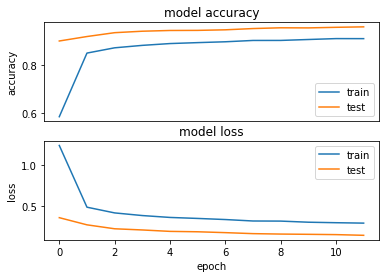

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xticks([])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

**Q3- Design the learning curve and talk about what you see.**

- The test accuracy is grater than the training accuracy. This indicates some overfitting

# **STEP3. Text mining using CNN**

## 3.1. Pre-Processing

In [4]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/amazon_cells_labelled.txt', names=[
'sentence', 'label'], sep='\t')


In [5]:
print(df.iloc[0])


sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object


In [ ]:
sentences = ['John likes ice cream', 'John hates chocolate.']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [ ]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [6]:
from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.796


In [10]:
X_train = vectorizer.transform(sentences_train).toarray()
X_test = vectorizer.transform(sentences_test).toarray()
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
input_dim = X_train.shape[1] # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
final_model = model.fit(X_train, y_train, epochs=100, validation_split=0.2 ,
batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 3s 4ms/step - loss: 0.6855 - accuracy: 0.5983 - val_loss: 0.6685 - val_accuracy: 0.7533
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.8250 - val_loss: 0.6329 - val_accuracy: 0.8533
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.9183 - val_loss: 0.5872 - val_accuracy: 0.8400
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.9467 - val_loss: 0.5340 - val_accuracy: 0.8667
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.9567 - val_loss: 0.4932 - val_accuracy: 0.8467
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.9717 - val_loss: 0.4585 - val_accuracy: 0.8467
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.9817 - val_loss: 0.4362 - val_accuracy: 0.8467
Epoch 8/100
6

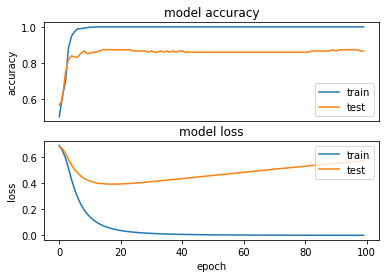

In [ ]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xticks([])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

**Q4- Explain these graphs. If you see any issue, suggest a solution to resolve it. Make the model by creating 3 hidden layers (first one 200 nodes, second one 100 nodes and last one 50 nodes and after each step, add dropout of 0.2 and report the accuracy.**

- ANS

Epoch 1/100
60/60 [==============================] - 1s 5ms/step - loss: 0.6746 - accuracy: 0.6400 - val_loss: 0.6172 - val_accuracy: 0.7800
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8817 - val_loss: 0.4320 - val_accuracy: 0.8200
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9683 - val_loss: 0.4382 - val_accuracy: 0.8400
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9967 - val_loss: 0.4361 - val_accuracy: 0.8533
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.4716 - val_accuracy: 0.8533
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.4982 - val_accuracy: 0.8467
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5212 - val_accuracy: 0.8533
Epoch 8/100
6

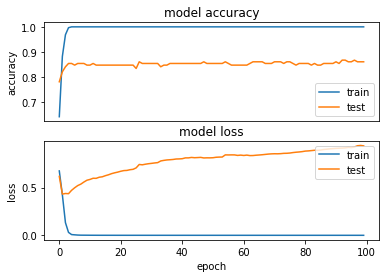

In [ ]:
# model with 3 hidden layers 200,100,50 & 20% dropout each
model = Sequential()
model.add(layers.Dense(200, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
final_model = model.fit(X_train, y_train, epochs=100, validation_split=0.2 ,
batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy: ",accuracy*100)


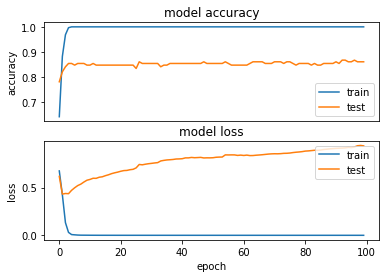

In [ ]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xticks([])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## 3.2. Embedded word

In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index
print(sentences_train[3])
print(X_train[3])

This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!
[7, 5, 1, 9, 8, 92, 11, 676, 2, 59, 101, 10, 677, 3, 32, 2, 71, 225, 5, 449]


In [14]:
for word in ['the', 'all', 'happy']:
  print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 32
happy: 86


In [15]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
# Pad variables with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


## 3.3. Model training

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
output_dim=embedding_dim,
input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           78700     
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 79,221
Trainable params: 79,221
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(X_train, y_train,
epochs=50,
validation_split=0.2,
batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy: ",accuracy)

Epoch 1/50
60/60 [==============================] - 1s 5ms/step - loss: 0.6886 - accuracy: 0.5567 - val_loss: 0.6792 - val_accuracy: 0.7267
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.8783 - val_loss: 0.6459 - val_accuracy: 0.7867
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.9400 - val_loss: 0.5747 - val_accuracy: 0.8067
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.9567 - val_loss: 0.4905 - val_accuracy: 0.7867
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2757 - accuracy: 0.9683 - val_loss: 0.4339 - val_accuracy: 0.8067
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.9817 - val_loss: 0.4058 - val_accuracy: 0.8133
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9867 - val_loss: 0.3939 - val_accuracy: 0.8067
Epoch 8/50
60/60 [==

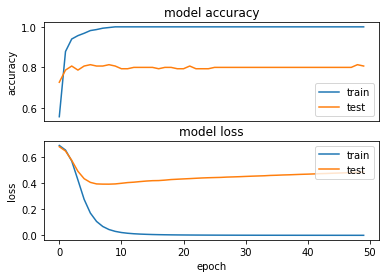

In [18]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xticks([])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Q5- How do you interpret these results?**

- Overfitting

**Q6- What is your recommendation to improve the accuracy? Implement your idea.**

- ANS

In [ ]:
%shell jupyter nbconvert --to html '//content/gdrive/My Drive/Colab
Notebooks/filename.ipynb'